In [1]:
import sys

sys.path.append("megai_man")

from stable_baselines3 import DQN
import matplotlib.pyplot as plt
import seaborn as sns

from env import make_venv

sns.set_theme()
plt.rcParams["figure.figsize"] = (20, 8)

In [2]:
def evaluate_policy_details(model, env):
    obs = env.reset()
    done = False
    current_length = 0
    actions_list = []
    rews_list = []
    while not done:
        actions, _ = model.predict(obs, state=None, deterministic=True)
        action = env.unwrapped.envs[0].unwrapped.get_action_meaning(actions[0])
        obs, rewards, dones, _ = env.step(actions)
        done = dones[0]
        current_length += 1

        actions_list.append(actions[0])
        rews_list.append(rewards[0])

    return actions_list, rews_list

In [3]:
venv = make_venv(
    n_envs=1,
    state="CutMan",
    sticky_prob=0.0,
    damage_terminate=False,
    truncate_if_no_improvement=True,
    obs_space="screen",
    action_space="discrete",
    render_mode=None,
    record=".",
)
model_name = "dqn_zoo_envfix4"
model = DQN.load(f"models/{model_name}", env=venv)
actions, rews = evaluate_policy_details(model, venv)
venv.close()

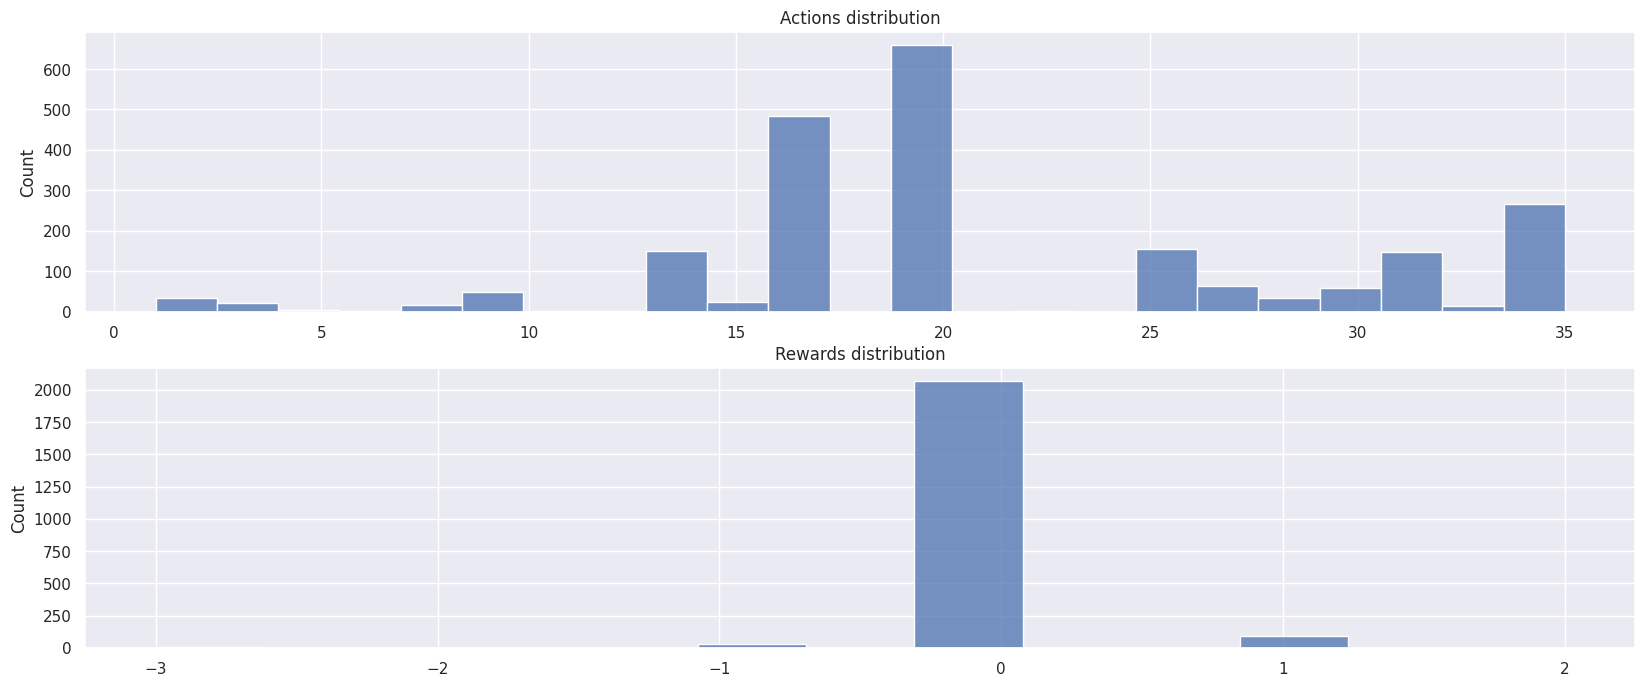

In [15]:
fig, axes = plt.subplots(2, 1)

ax = axes[0]
sns.histplot(actions, ax=ax)
ax.set_title("Actions distribution")

ax = axes[1]
sns.histplot(rews, ax=ax)
ax.set_title("Rewards distribution")

plt.show()